In [2]:
# Import libraries
import numpy as np
import pandas as pd

# Reading ratings file
ratings = pd.read_csv(r'ratings.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'movie_id', 'rating', 'timestamp'])

# Reading users file
users = pd.read_csv(r'users.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('movies.csv', sep='\t', encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

In [3]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
n_users = ratings.user_id.unique().shape[0]
n_movies = ratings.movie_id.unique().shape[0]
print('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_movies))

Number of users = 6040 | Number of movies = 3706


In [6]:
Ratings = ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0)
Ratings.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Convert DataFrame to NumPy array
R = Ratings.values  # or use R = Ratings.to_numpy()
user_ratings_mean = np.mean(R, axis=1)
Ratings_demeaned = R - user_ratings_mean.reshape(-1, 1)


In [8]:
sparsity = round(1.0 - len(ratings) / float(n_users * n_movies), 3)
print('The sparsity level of MovieLens1M dataset is ' + str(sparsity * 100) + '%')


The sparsity level of MovieLens1M dataset is 95.5%


In [9]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(Ratings_demeaned, k = 50)

In [10]:
sigma = np.diag(sigma)

In [11]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [12]:
preds = pd.DataFrame(all_user_predicted_ratings, columns = Ratings.columns)
preds.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
0,4.288861,0.143055,-0.195080,-0.018843,0.012232,-0.176604,-0.074120,0.141358,-0.059553,-0.195950,...,0.027807,0.001640,0.026395,-0.022024,-0.085415,0.403529,0.105579,0.031912,0.050450,0.088910
1,0.744716,0.169659,0.335418,0.000758,0.022475,1.353050,0.051426,0.071258,0.161601,1.567246,...,-0.056502,-0.013733,-0.010580,0.062576,-0.016248,0.155790,-0.418737,-0.101102,-0.054098,-0.140188
2,1.818824,0.456136,0.090978,-0.043037,-0.025694,-0.158617,-0.131778,0.098977,0.030551,0.735470,...,0.040481,-0.005301,0.012832,0.029349,0.020866,0.121532,0.076205,0.012345,0.015148,-0.109956
3,0.408057,-0.072960,0.039642,0.089363,0.041950,0.237753,-0.049426,0.009467,0.045469,-0.111370,...,0.008571,-0.005425,-0.008500,-0.003417,-0.083982,0.094512,0.057557,-0.026050,0.014841,-0.034224
4,1.574272,0.021239,-0.051300,0.246884,-0.032406,1.552281,-0.199630,-0.014920,-0.060498,0.450512,...,0.110151,0.046010,0.006934,-0.015940,-0.050080,-0.052539,0.507189,0.033830,0.125706,0.199244


In [13]:
def recommend_movies(predictions, userID, movies, original_ratings, num_recommendations):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1  # User ID starts at 1, not 0
    sorted_user_predictions = predictions.iloc[user_row_number].sort_values(ascending=False)  # User ID starts at 1
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings[original_ratings.user_id == userID]
    user_full = (user_data.merge(movies, how='left', left_on='movie_id', right_on='movie_id')
                     .sort_values(['rating'], ascending=False)
                 )

    print('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print('Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies[~movies['movie_id'].isin(user_full['movie_id'])]
         .merge(pd.DataFrame(sorted_user_predictions).reset_index(), how='left',
                left_on='movie_id',
                right_on='movie_id')
         .rename(columns={user_row_number: 'Predictions'})
         .sort_values('Predictions', ascending=False)
         .iloc[:num_recommendations, :-1]
    )

    return user_full, recommendations


In [14]:
already_rated, predictions = recommend_movies(preds, 1310, movies, ratings, 20)

User 1310 has already rated 24 movies.
Recommending highest 20 predicted ratings movies not already rated.


In [15]:
# Top 20 movies that User 1310 has rated 
already_rated.head(20)

,user_id,movie_id,rating,timestamp,title,genres
5,1310,2248,5,974781573,Say Anything... (1989),Comedy|Drama|Romance
6,1310,2620,5,974781573,This Is My Father (1998),Drama|Romance
7,1310,3683,5,974781935,Blood Simple (1984),Drama|Film-Noir
15,1310,1704,5,974781573,Good Will Hunting (1997),Drama
1,1310,1293,5,974781839,Gandhi (1982),Drama
12,1310,3101,4,974781573,Fatal Attraction (1987),Thriller
11,1310,1343,4,974781534,Cape Fear (1991),Thriller
20,1310,2000,4,974781892,Lethal Weapon (1987),Action|Comedy|Crime|Drama
18,1310,3526,4,974781892,Parenthood (1989),Comedy|Drama
17,1310,3360,4,974781935,Hoosiers (1986),Drama


In [16]:
# Top 20 movies that User 1310 hopefully will enjoy
predictions

,movie_id,title,genres
1618,1674,Witness (1985),Drama|Romance|Thriller
1880,1961,Rain Man (1988),Drama
1187,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War
1216,1242,Glory (1989),Action|Drama|War
1202,1225,Amadeus (1984),Drama
1273,1302,Field of Dreams (1989),Drama
1220,1246,Dead Poets Society (1989),Drama
1881,1962,Driving Miss Daisy (1989),Drama
1877,1957,Chariots of Fire (1981),Drama
1938,2020,Dangerous Liaisons (1988),Drama|Romance


In [17]:
##Model Evaluation

In [ ]:
!conda install -c conda-forge scikit-surprise

In [17]:
# Import libraries from Surprise package
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

# Load Reader library
reader = Reader()

# Load ratings dataset with Dataset library
data = Dataset.load_from_df(ratings[['user_id', 'movie_id', 'rating']], reader)

# Perform 5-fold cross-validation
cross_validate(SVD(), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8716  0.8745  0.8738  0.8759  0.8736  0.8739  0.0014  
MAE (testset)     0.6844  0.6860  0.6864  0.6871  0.6861  0.6860  0.0009  
Fit time          5.27    5.30    5.55    5.62    5.56    5.46    0.14    
Test time         1.43    1.20    1.27    1.25    1.26    1.28    0.08    


{'test_rmse': array([0.87162938, 0.8744903 , 0.87377806, 0.87586513, 0.87361245]),
 'test_mae': array([0.68435698, 0.68596662, 0.6863551 , 0.68713085, 0.68614837]),
 'fit_time': (5.274281978607178,
  5.303838014602661,
  5.551177501678467,
  5.61968731880188,
  5.5617170333862305),
 'test_time': (1.4327454566955566,
  1.2010090351104736,
  1.269005298614502,
  1.2476885318756104,
  1.2587997913360596)}

In [21]:
# Import libraries from Surprise package
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

# Load Reader library
reader = Reader()

# Load ratings dataset with Dataset library
data = Dataset.load_from_df(ratings[['user_id', 'movie_id', 'rating']], reader)

# Build the full training set
trainset = data.build_full_trainset()

# Create an instance of the SVD model
svd = SVD()

# Train the SVD model on the training set
svd.fit(trainset)

# Now you can proceed with predictions or evaluations as needed


In [22]:
ratings[ratings['user_id'] == 1310]

,user_id,movie_id,rating,timestamp
215928,1310,2988,3,974781935
215929,1310,1293,5,974781839
215930,1310,1295,2,974782001
215931,1310,1299,4,974781701
215932,1310,2243,4,974782001
215933,1310,2248,5,974781573
215934,1310,2620,5,974781573
215935,1310,3683,5,974781935
215936,1310,3685,4,974781935
215937,1310,1185,4,974781839


In [23]:
svd.predict(1310, 1994)

Prediction(uid=1310, iid=1994, r_ui=None, est=3.446487930786135, details={'was_impossible': False})

#K-Clustering

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
# Standardizing the ratings
scaler = StandardScaler()
scaled_ratings = scaler.fit_transform(Ratings)

# Optional: Check the first few rows of the scaled data
scaled_ratings_df = pd.DataFrame(scaled_ratings, columns=Ratings.columns)
scaled_ratings_df.head()


movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
0,1.758734,-0.344462,-0.274956,-0.159317,-0.214328,-0.415292,-0.274471,-0.101751,-0.121857,-0.400567,...,-0.11754,-0.032983,-0.069767,-0.117019,-0.090777,-0.390685,-0.223267,-0.091368,-0.078855,-0.253864
1,-0.701718,-0.344462,-0.274956,-0.159317,-0.214328,-0.415292,-0.274471,-0.101751,-0.121857,-0.400567,...,-0.11754,-0.032983,-0.069767,-0.117019,-0.090777,-0.390685,-0.223267,-0.091368,-0.078855,-0.253864
2,-0.701718,-0.344462,-0.274956,-0.159317,-0.214328,-0.415292,-0.274471,-0.101751,-0.121857,-0.400567,...,-0.11754,-0.032983,-0.069767,-0.117019,-0.090777,-0.390685,-0.223267,-0.091368,-0.078855,-0.253864
3,-0.701718,-0.344462,-0.274956,-0.159317,-0.214328,-0.415292,-0.274471,-0.101751,-0.121857,-0.400567,...,-0.11754,-0.032983,-0.069767,-0.117019,-0.090777,-0.390685,-0.223267,-0.091368,-0.078855,-0.253864
4,-0.701718,-0.344462,-0.274956,-0.159317,-0.214328,0.960662,-0.274471,-0.101751,-0.121857,-0.400567,...,-0.11754,-0.032983,-0.069767,-0.117019,-0.090777,-0.390685,-0.223267,-0.091368,-0.078855,-0.253864


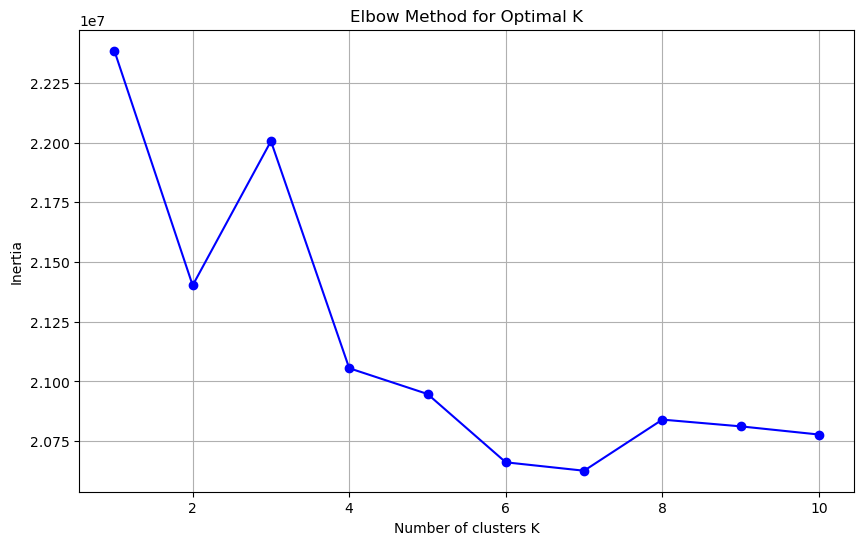

In [26]:
# Finding the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_ratings)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()


In [27]:
# Choosing K based on the elbow method (let's say K=5)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_ratings)

# Assign the cluster labels to the original ratings DataFrame
Ratings['Cluster'] = kmeans.labels_


movie_id  Cluster         1         2         3         4         5         6  \
0               0  4.000000  4.000000  0.000000  4.000000  4.000000  3.000000   
1               1  0.986283  0.161332  0.114958  0.019813  0.044851  0.313521   
2               2  4.000000  2.000000  1.500000  0.000000  1.500000  0.500000   
3               3  2.679402  0.843023  0.515781  0.183555  0.353821  1.362957   
4               4  3.520833  2.000000  1.208333  0.616667  1.045833  2.337500   

movie_id         7         8         9  ...      3943      3944      3945  \
0         3.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
1         0.099499  0.016111  0.015241  ...  0.028086  0.001089  0.006532   
2         1.500000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3         0.595515  0.063123  0.083887  ...  0.077243  0.005814  0.019934   
4         1.591667  0.229167  0.416667  ...  0.295833  0.029167  0.041667   

movie_id      3946      3947      3948      3949  

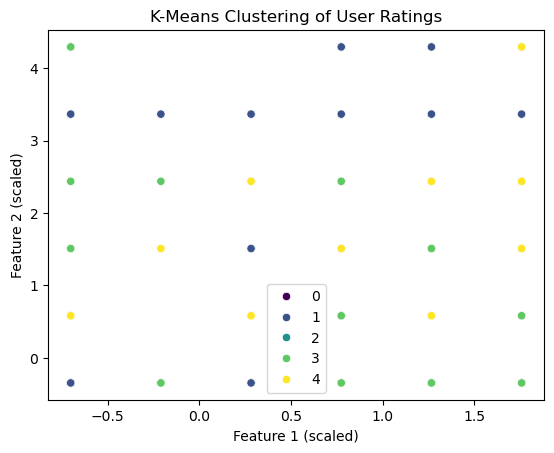

In [28]:
# Analyze the clusters
cluster_summary = Ratings.groupby('Cluster').mean().reset_index()
print(cluster_summary)

# Visualizing the clusters using a scatter plot (for 2D visualization)
sns.scatterplot(x=scaled_ratings[:, 0], y=scaled_ratings[:, 1], hue=kmeans.labels_, palette='viridis')
plt.title('K-Means Clustering of User Ratings')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()


#K-FAST

movie_id    1    2    3    4    5    6    7    8    9   10  ...  3944  3945  \
user_id                                                     ...               
1         5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
2         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
3         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
4         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
5         0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   

movie_id  3946  3947  3948  3949  3950  3951  3952  Cluster  
user_id                                                      
1          0.0   0.0   0.0   0.0   0.0   0.0   0.0        1  
2          0.0   0.0   0.0   0.0   0.0   0.0   0.0        2  
3          0.0   0.0   0.0   0.0   0.0   0.0   0.0        1  
4          0.0   0.0   0.0   0.0   0.0   0.0   0.0        1  
5          0.0   0.0   0.0   0.0   0.0   0.0   0.0        4  

[5 rows x 3

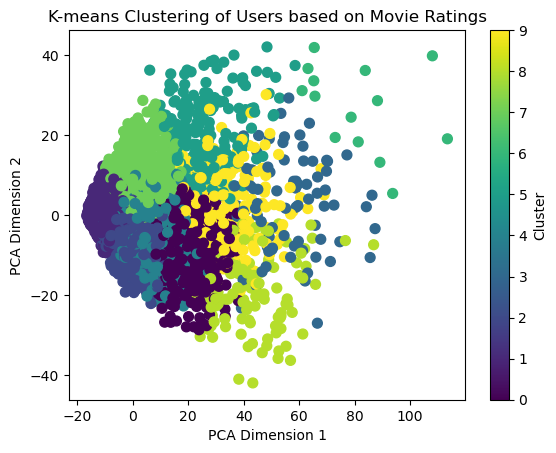

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Number of clusters (e.g., 10 clusters, you can adjust this)
n_clusters = 10

# Initialize KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the KMeans model on the ratings matrix
kmeans.fit(R)

# Retrieve the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame for further analysis
Ratings['Cluster'] = cluster_labels

# Print out the first few cluster assignments
print(Ratings.head())

# Visualize clusters in 2D (optional, for reduced dimensions using PCA)
from sklearn.decomposition import PCA

# Reduce the dimensionality to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(R)

# Scatter plot the reduced data points
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title("K-means Clustering of Users based on Movie Ratings")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.colorbar(label="Cluster")
plt.show()


C:\Users\Badiuddin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


movie_id    1    2    3    4    5    6    7    8    9   10  ...  3945  3946  \
user_id                                                     ...               
1         5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
2         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
3         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
4         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
5         0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   

movie_id  3947  3948  3949  3950  3951  3952  Cluster  MiniBatch_Cluster  
user_id                                                                   
1          0.0   0.0   0.0   0.0   0.0   0.0        1                  1  
2          0.0   0.0   0.0   0.0   0.0   0.0        2                  2  
3          0.0   0.0   0.0   0.0   0.0   0.0        1                  9  
4          0.0   0.0   0.0   0.0   0.0   0.0        1                  

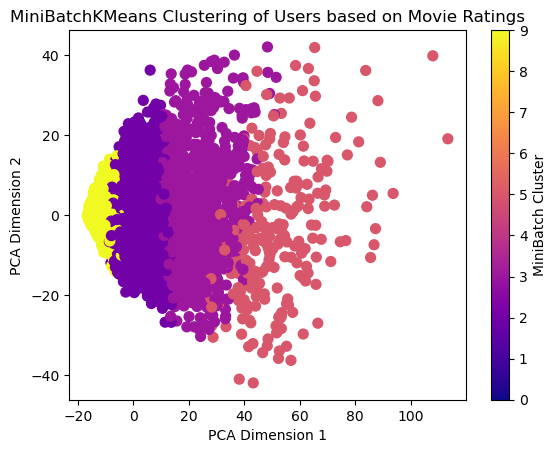

In [40]:
from sklearn.cluster import MiniBatchKMeans

# Initialize MiniBatchKMeans
mini_kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=100, random_state=42)

# Fit the model on the same data (user-movie ratings matrix)
mini_kmeans.fit(R)

# Get the cluster labels from MiniBatchKMeans
mini_cluster_labels = mini_kmeans.labels_

# Add the MiniBatchKMeans cluster labels to the DataFrame
Ratings['MiniBatch_Cluster'] = mini_cluster_labels

# Print the first few cluster assignments
print(Ratings.head())

# Visualize the MiniBatchKMeans clustering result in 2D
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=mini_cluster_labels, cmap='plasma', s=50)
plt.title("MiniBatchKMeans Clustering of Users based on Movie Ratings")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.colorbar(label="MiniBatch Cluster")
plt.show()


In [41]:
# Analyze users in a specific cluster, e.g., Cluster 0
cluster_0_users = Ratings[Ratings['Cluster'] == 0]

# Display the cluster
print("Users in Cluster 0:")
print(cluster_0_users.head())


Users in Cluster 0:
movie_id    1    2    3    4    5    6    7    8    9   10  ...  3945  3946  \
user_id                                                     ...               
10        5.0  5.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...   0.0   0.0   
18        4.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0  ...   0.0   0.0   
19        5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0  ...   0.0   0.0   
22        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0  ...   0.0   0.0   
23        4.0  2.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   

movie_id  3947  3948  3949  3950  3951  3952  Cluster  MiniBatch_Cluster  
user_id                                                                   
10         0.0   4.0   0.0   0.0   0.0   0.0        0                  3  
18         0.0   0.0   0.0   0.0   0.0   0.0        0                  3  
19         0.0   4.0   0.0   0.0   0.0   0.0        0                  2  
22         0.0   0.0   0.0   0.0   0.0   0.0       

In [42]:
!dir

 Volume in drive C is Windows-SSD
 Volume Serial Number is AAC6-2391

 Directory of C:\Users\Badiuddin

30-09-2024  03.01 PM    <DIR>          .
03-02-2024  05.19 PM    <DIR>          ..
31-03-2024  11.42 PM    <DIR>          .anaconda
30-09-2024  02.27 PM    <DIR>          .conda
31-03-2024  11.43 PM                25 .condarc
31-03-2024  11.42 PM    <DIR>          .continuum
30-09-2024  03.01 PM    <DIR>          .ipynb_checkpoints
31-03-2024  11.44 PM    <DIR>          .ipython
01-04-2024  05.13 PM    <DIR>          .jupyter
29-09-2024  09.09 PM    <DIR>          .keras
21-08-2024  04.11 PM    <DIR>          .librarymanager
30-09-2024  02.53 PM    <DIR>          .matplotlib
11-09-2024  04.08 PM    <DIR>          .ms-ad
26-03-2024  10.32 PM    <DIR>          .nuget
30-09-2024  02.33 PM    <DIR>          .surprise_data
30-09-2024  02.32 PM    <DIR>          anaconda3
04-02-2024  08.00 AM    <DIR>          Contacts
08-04-2024  01.04 AM           741,717 data.csv
08-04-2024  12.57 AM   